In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from helper import load_folder,seconds_to_hhmmss,load_and_rename_csv_files_2020,create_folder,load_and_rename_2024_07
year = "2024"
year_int= 2024

In [2]:
path = 'Graphics'
folder_name = year
full_path = create_folder(path, folder_name)


In [3]:
column_names = ['ride_id','rideable_type','started_at','ended_at','start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual']
df = load_and_rename_csv_files_2020(year, column_names)
#df = load_and_rename_2024_07(year, column_names)

/home/lbrochma/projects/rand/helper.py:199: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/home/lbrochma/projects/rand/helper.py:199: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/home/lbrochma/projects/rand/helper.py:199: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/home/lbrochma/projects/rand/helper.py:199: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/home/lbrochma/projects/rand/helper.py:199: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/home/lbrochma/projects/rand/helper.py:199: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  d

In [4]:
df = df[df['started_at'].dt.year >= year_int]
df= df[df['started_at'].dt.month > 8]


In [5]:

# Calculate trip duration
df['trip_duration'] = (pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])).dt.total_seconds()


# Identify oddities
oddities = df[(df['trip_duration'] <= 0) | 
              ((df['start_station_id'] == df['end_station_id']) & (df['trip_duration'] > 600)) |  # Same start and end station with duration > 10 minutes
              (df['trip_duration'] > 86400)] 

# Display oddities
oddities.trip_duration=oddities.trip_duration.apply(seconds_to_hhmmss)
oddities


/tmp/ipykernel_20689/3728700505.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oddities.trip_duration=oddities.trip_duration.apply(seconds_to_hhmmss)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
15868,7E4CF52A787AE99B,electric_bike,2024-09-17 10:16:19.284,2024-09-17 11:19:30.804,Central Park S & 6 Ave,6876.04,Central Park S & 6 Ave,6876.04,40.765909,-73.976342,40.765909,-73.976342,casual,01:03:11
15871,1E964D248CA3089C,electric_bike,2024-09-02 17:07:37.456,2024-09-02 17:57:11.438,Central Park S & 6 Ave,6876.04,Central Park S & 6 Ave,6876.04,40.765909,-73.976342,40.765909,-73.976342,casual,00:49:33
15872,04E41B5758377357,electric_bike,2024-09-02 11:10:04.169,2024-09-02 11:49:46.648,Central Park S & 6 Ave,6876.04,Central Park S & 6 Ave,6876.04,40.765909,-73.976342,40.765909,-73.976342,casual,00:39:42
15873,93EEB5FB916077B7,classic_bike,2024-09-02 08:51:42.006,2024-09-02 09:05:00.105,Central Park S & 6 Ave,6876.04,Central Park S & 6 Ave,6876.04,40.765909,-73.976342,40.765909,-73.976342,casual,00:13:18
15875,F2357CC1145BCCD8,electric_bike,2024-09-02 12:06:31.781,2024-09-02 12:53:26.709,Central Park S & 6 Ave,6876.04,Central Park S & 6 Ave,6876.04,40.765909,-73.976342,40.765909,-73.976342,casual,00:46:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118144,539ED4E23D8A3A16,electric_bike,2024-09-11 21:48:37.448,2024-09-11 22:07:57.681,Cauldwell Ave & E 161 St,7952.02,Cauldwell Ave & E 161 St,7952.02,40.821880,-73.907521,40.821880,-73.907521,member,00:19:20
10118150,E43F8EC410D0582B,classic_bike,2024-09-20 19:47:04.836,2024-09-20 20:21:20.163,39 St & 50 Ave,6025.08,39 St & 50 Ave,6025.08,40.738249,-73.927375,40.738249,-73.927375,member,00:34:15
10118151,8F70BFFB431D1855,classic_bike,2024-09-19 20:38:54.015,2024-09-19 20:50:55.018,39 St & 50 Ave,6025.08,39 St & 50 Ave,6025.08,40.738249,-73.927375,40.738249,-73.927375,member,00:12:01
10118153,7D5772277B5351B0,electric_bike,2024-09-18 22:33:25.935,2024-09-18 23:07:43.947,Maple St & Albany Ave,3608.06,Maple St & Albany Ave,3608.06,40.661550,-73.939740,40.661550,-73.939740,member,00:34:18


In [6]:
df[df.trip_duration>86400]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
234380,97633E300A62D9A8,classic_bike,2024-09-24 21:55:54.032,2024-09-25 22:03:00.826,8 Ave & W 49 St,6747.07,W 56 St & 8 Ave,6884.03,40.761712,-73.986551,40.765959,-73.983135,member,86826.794
635363,C579E444C7A4A15C,classic_bike,2024-09-20 17:52:55.743,2024-09-21 18:18:37.937,W 48 St & Rockefeller Plaza,6626.11,W 42 St & Dyer Ave,6644.07,40.757769,-73.979294,40.758985,-73.993800,casual,87942.194
638038,8BD112C5DAB01BD7,classic_bike,2024-09-18 12:46:30.931,2024-09-19 13:24:28.693,W 31 St & 7 Ave,6331.01,University Pl & E 14 St,5905.14,40.749156,-73.991600,40.734814,-73.992085,member,88677.762
795176,243F6251E04F5D8D,classic_bike,2024-09-09 11:59:32.567,2024-09-10 12:59:27.160,Pier 61 at Chelsea Piers,6233.04,NaN,NaN,40.746872,-74.008210,NaN,NaN,member,89994.593
795207,218213A25D56AA97,classic_bike,2024-09-01 17:36:01.089,2024-09-02 18:35:39.039,Pier 61 at Chelsea Piers,6233.04,NaN,NaN,40.746872,-74.008210,NaN,NaN,casual,89977.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572562,02FF66A020181CA0,classic_bike,2024-09-12 08:06:35.893,2024-09-13 08:56:28.157,6 Ave & Walker St,5430.10,Broadway & W 36 St,6441.01,40.719792,-74.005224,40.750977,-73.987654,casual,89392.264
9602028,D38093375DEAC578,classic_bike,2024-09-12 08:01:40.555,2024-09-13 08:56:28.157,Madison Ave & E 26 St,6131.12,Broadway & W 36 St,6441.01,40.742685,-73.986713,40.750977,-73.987654,member,89687.602
9602396,6F7CE0B653A98EEA,classic_bike,2024-09-12 08:31:38.422,2024-09-13 08:56:28.157,2 Ave & E 31 St,6197.11,Broadway & W 36 St,6441.01,40.742990,-73.977110,40.750977,-73.987654,member,87889.735
9611780,C881DBBECD08FA24,classic_bike,2024-09-12 08:33:54.157,2024-09-13 08:56:28.157,E 35 St & Madison Ave,6398.08,Broadway & W 36 St,6441.01,40.748480,-73.982556,40.750977,-73.987654,member,87754.000


In [7]:
year="2024_09"

/tmp/ipykernel_20689/3329065645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_trip["started_at"] = pd.to_datetime(round_trip["started_at"])


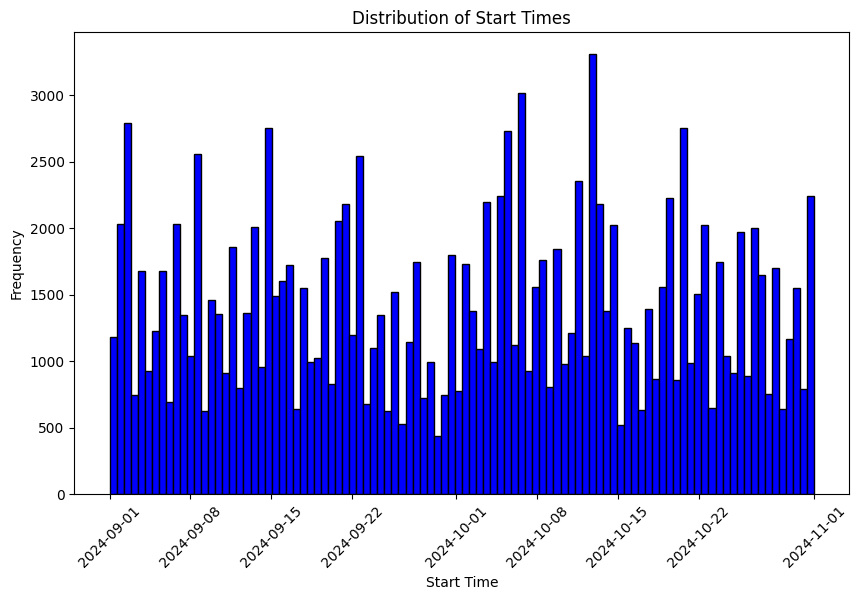

<Figure size 640x480 with 0 Axes>

In [8]:
round_trip=df[(df['start_station_id'] == df['end_station_id'])]
round_trip["started_at"] = pd.to_datetime(round_trip["started_at"])

plt.figure(figsize=(10, 6))
plt.hist(round_trip['started_at'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.title('Distribution of Start Times')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f'Graphics/{year}'f'/DistributionOfStartTimes{year}.png')

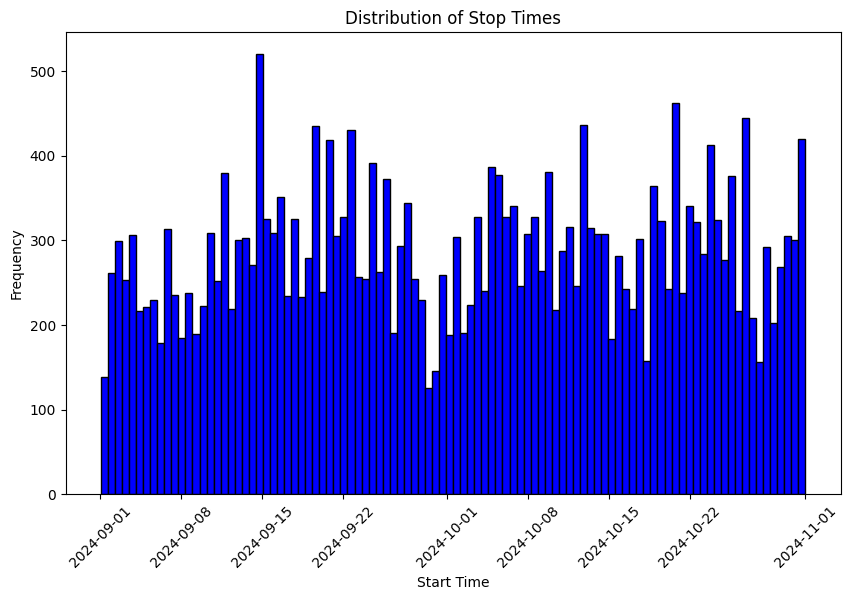

In [9]:
end_station=df[df["end_station_name"].isna()== True]

#end_station["stoptime"] = pd.to_datetime(end_station["starttime"])

plt.figure(figsize=(10, 6))
plt.hist(end_station['ended_at'], bins=100, color='blue', edgecolor='black')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.title('Distribution of Stop Times')
plt.xticks(rotation=45)
plt.show()

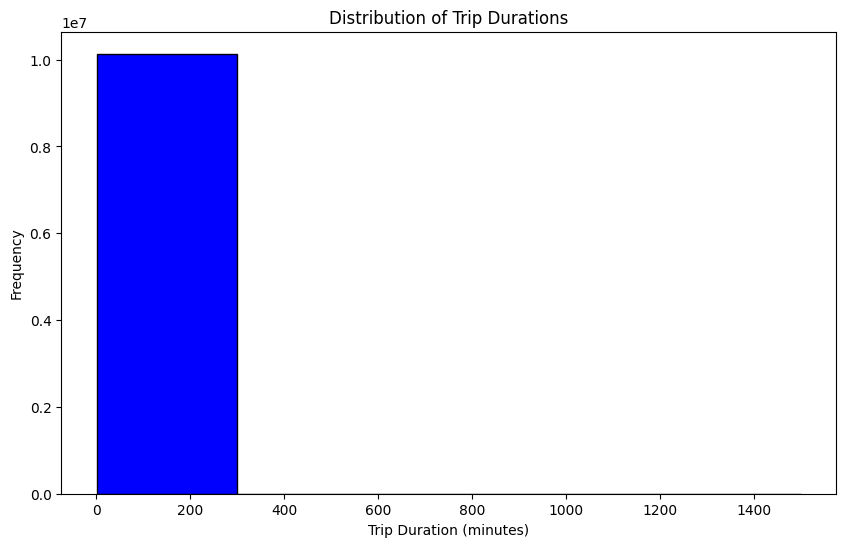

<Figure size 640x480 with 0 Axes>

In [10]:
df['tripduration_minutes'] = df['trip_duration'] / 60

# Plot the distribution of trip durations
plt.figure(figsize=(10, 6))
plt.hist(df['tripduration_minutes'], bins=5, color='blue', edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()
plt.savefig(f'Graphics/{year}'+f'/DistributionOfTripDurations{year}.png')

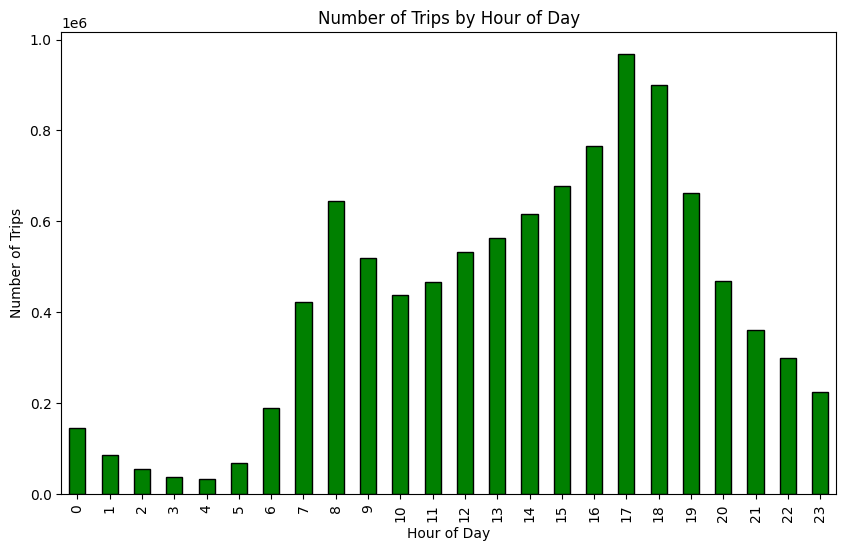

<Figure size 640x480 with 0 Axes>

In [11]:
df['hour'] = df['started_at'].dt.hour

# Plot the number of trips by hour of day
plt.figure(figsize=(10, 6))
df['hour'].value_counts().sort_index().plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour of Day')
plt.show()
plt.savefig(f'Graphics/{year}'+f'/NumberOfTripsbyHourofDay{year}.png')

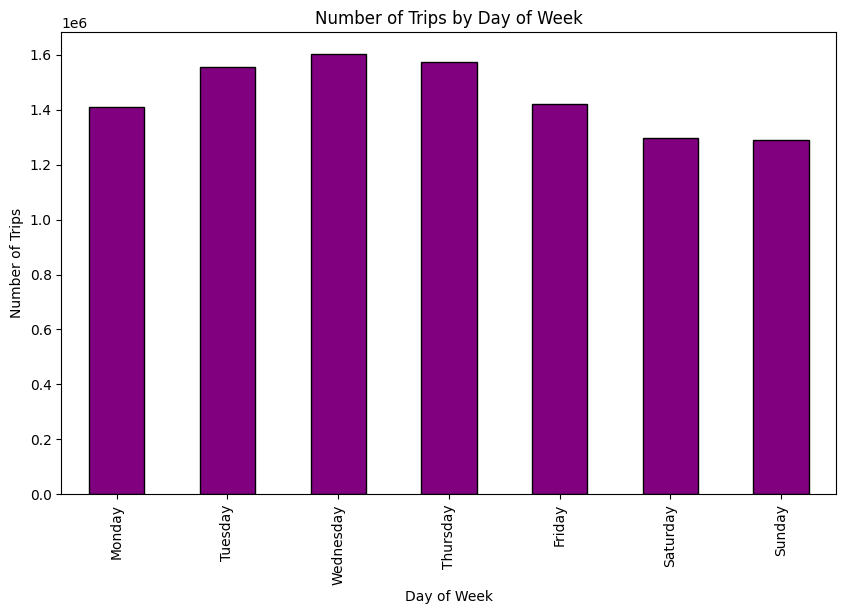

<Figure size 640x480 with 0 Axes>

In [12]:
df['day_of_week'] = df['started_at'].dt.day_name()

# Plot the number of trips by day of week
plt.figure(figsize=(10, 6))
df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day of Week')
plt.show()
plt.savefig(f'Graphics/{year}'+f'/NumberofTripsbyDayofWeek{year}.png')

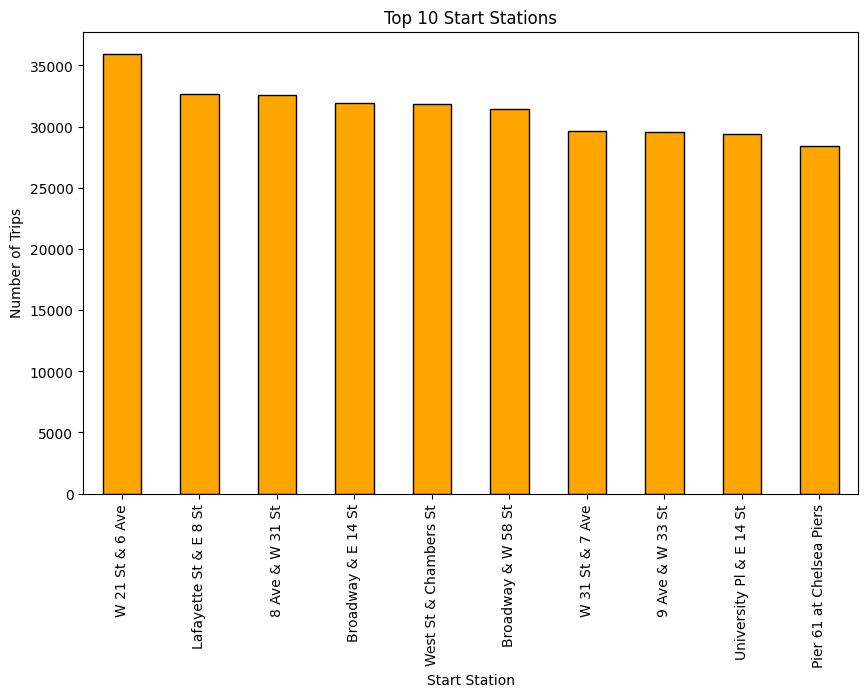

<Figure size 640x480 with 0 Axes>

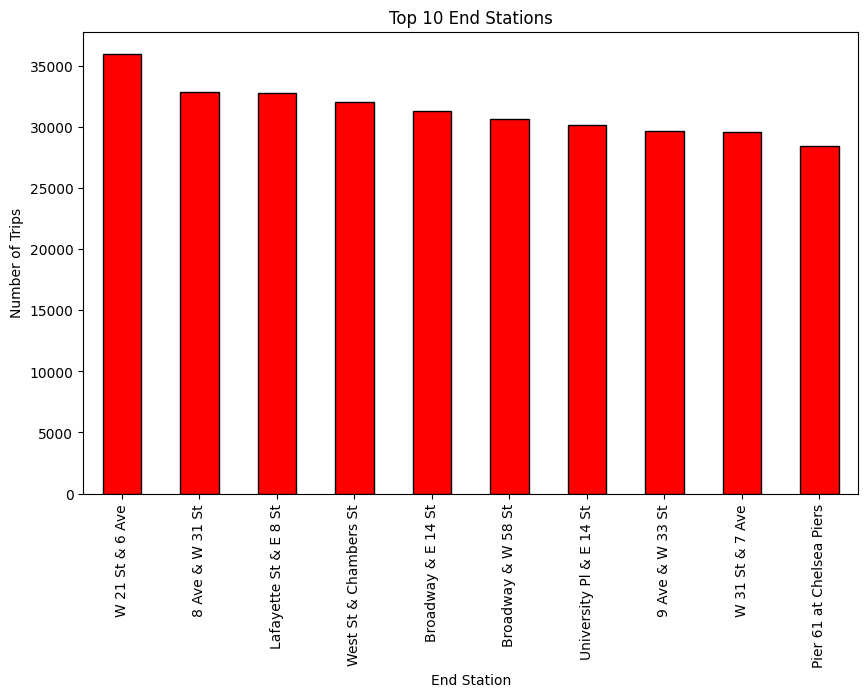

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the most popular start stations
plt.figure(figsize=(10, 6))
df['start_station_name'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.title('Top 10 Start Stations')
plt.show()
plt.savefig(f'Graphics/{year}'+f'/DistributionOfStartStations{year}.png')

# Plot the most popular end stations
plt.figure(figsize=(10, 6))
df['end_station_name'].value_counts().head(10).plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.title('Top 10 End Stations')
plt.show()
plt.savefig(f'Graphics/{year}'+f'/DistributionOfStopStations{year}.png')

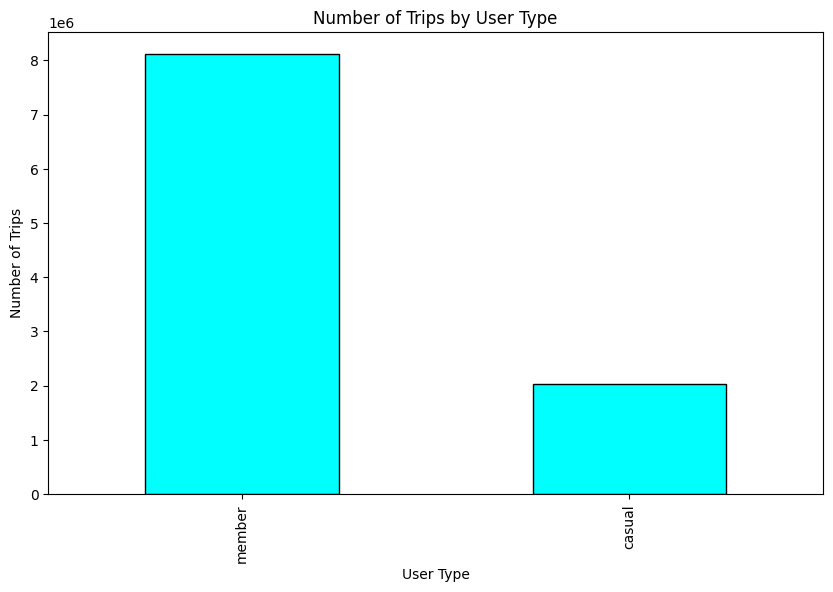

<Figure size 640x480 with 0 Axes>

In [14]:
# Plot the number of trips by user type
plt.figure(figsize=(10, 6))
df['member_casual'].value_counts().plot(kind='bar', color='cyan', edgecolor='black')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by User Type')
plt.show()
plt.savefig(f'Graphics/{year}'+f'/NumberofTripsbyUserType{year}.png')

/tmp/ipykernel_20689/69208708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Month'] = customers['started_at'].dt.to_period('M')


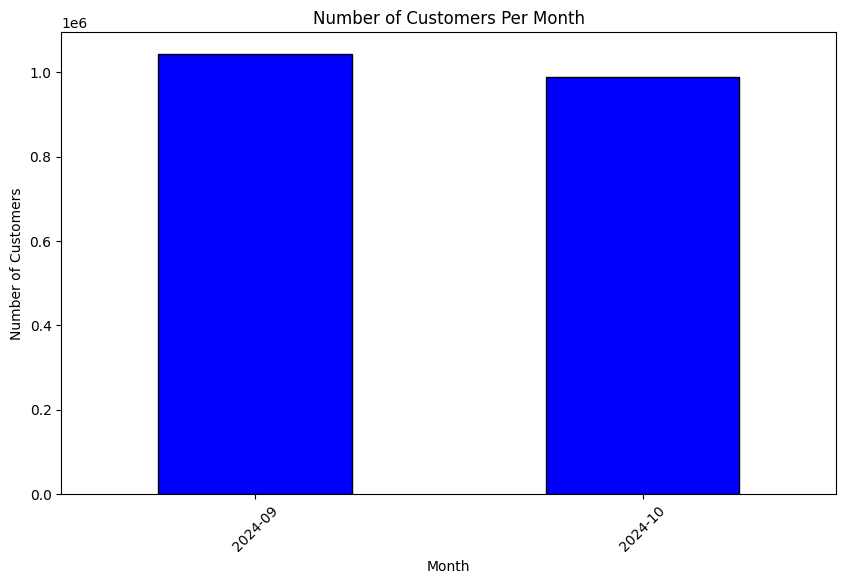

/tmp/ipykernel_20689/69208708.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscriber['Month'] = subscriber['started_at'].dt.to_period('M')


<Figure size 640x480 with 0 Axes>

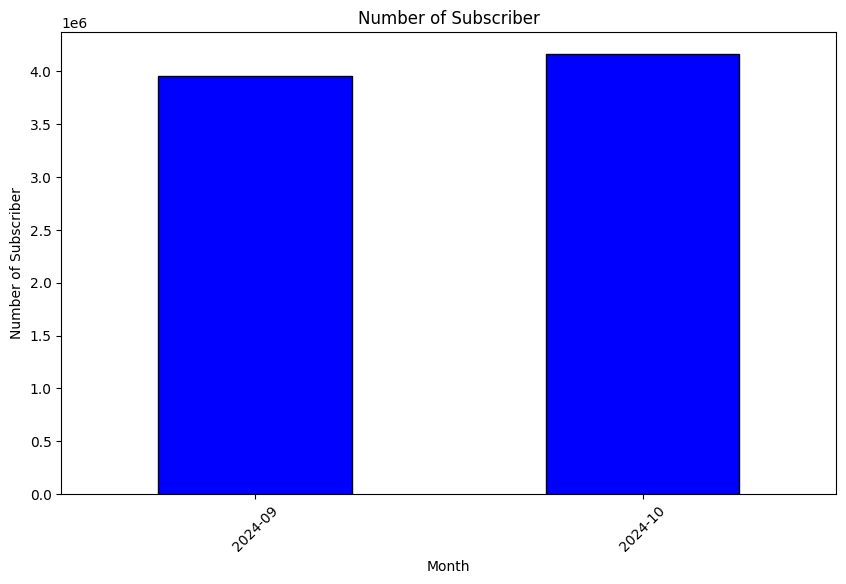

<Figure size 640x480 with 0 Axes>

In [15]:
# Filter for customers

customers = df[df['member_casual'] == 'casual']

# Group by month and count customers
customers['Month'] = customers['started_at'].dt.to_period('M')
customers_per_month = customers.groupby('Month').size()

# Plot the data
plt.figure(figsize=(10, 6))
customers_per_month.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Per Month')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f'Graphics/{year}'+f'/NumberofCustomerperMonth{year}.png')

# Filter for subscribers
subscriber = df[df['member_casual'] == 'member']
#Group by month and count subscribers
subscriber['Month'] = subscriber['started_at'].dt.to_period('M')
subscriber_per_month = subscriber.groupby('Month').size()

# Plot the data
plt.figure(figsize=(10, 6))
subscriber_per_month.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Subscriber')
plt.title('Number of Subscriber')
plt.xticks(rotation=45)
plt.show()
plt.savefig(f'Graphics/{year}'+f'/NumberofSubscriberperMonth{year}.png')

/tmp/ipykernel_20689/1591830547.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscribers['Month'] = subscribers['started_at'].dt.to_period('M')


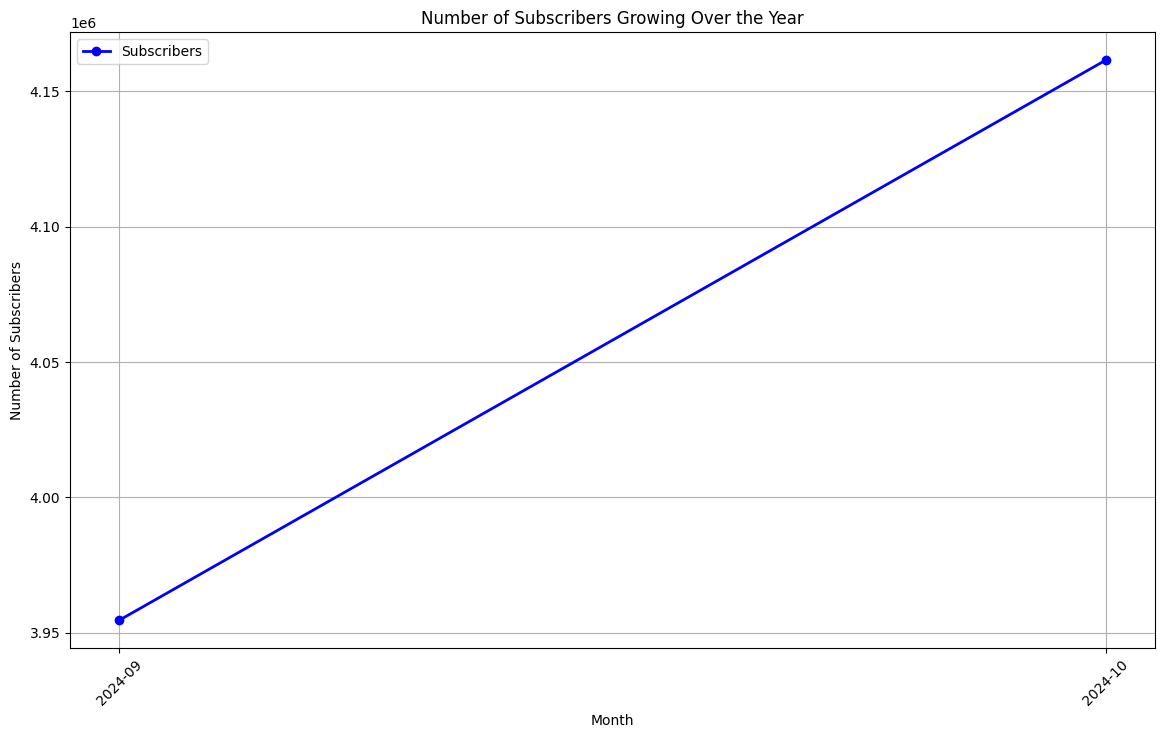

<Figure size 640x480 with 0 Axes>

In [16]:
subscribers = df[df['member_casual'] == 'member']

# Group by month and count subscribers
subscribers['Month'] = subscribers['started_at'].dt.to_period('M')
subscribers_per_month = subscribers.groupby('Month').size()

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(subscribers_per_month.index.astype(str), subscribers_per_month, color='blue', linestyle='-', linewidth=2, marker='o', label='Subscribers')
plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.title('Number of Subscribers Growing Over the Year')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

plt.savefig(f'Graphics/{year}'+f'/NumberofsubscriberGrowth{year}.png')

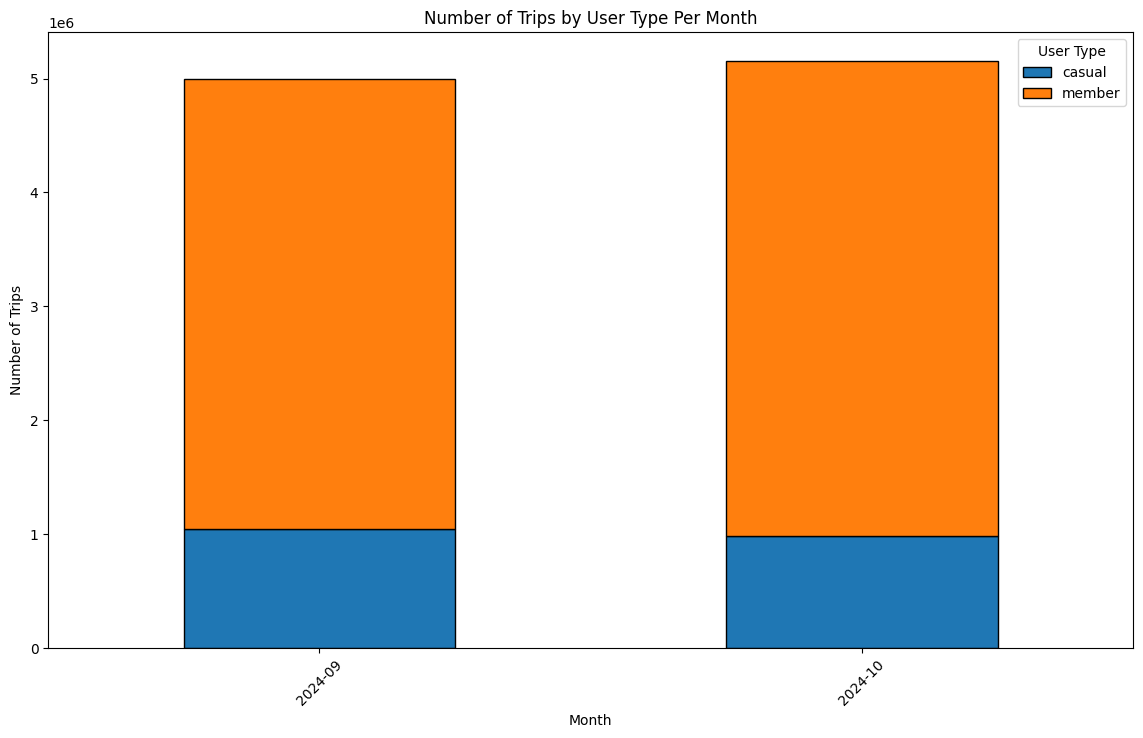

In [17]:
# Convert starttime column to datetime
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')

# Extract month and year from starttime
df['year_month'] = df['started_at'].dt.to_period('M')

# Group by user type and month, and count trips
trips_per_usertype_month = df.groupby(['year_month', 'member_casual']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
trips_per_usertype_month.plot(kind='bar', stacked=True, edgecolor='black', ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by User Type Per Month')
plt.xticks(rotation=45)
plt.legend(title='User Type')

# Save the plot to a directory with a specific name
plt.savefig(f'Graphics/{year}'+f'/NumberofTripsbyUserTypePerMonth{year}.png')

# Display the plot
plt.show()

# Display the plot
plt.show()

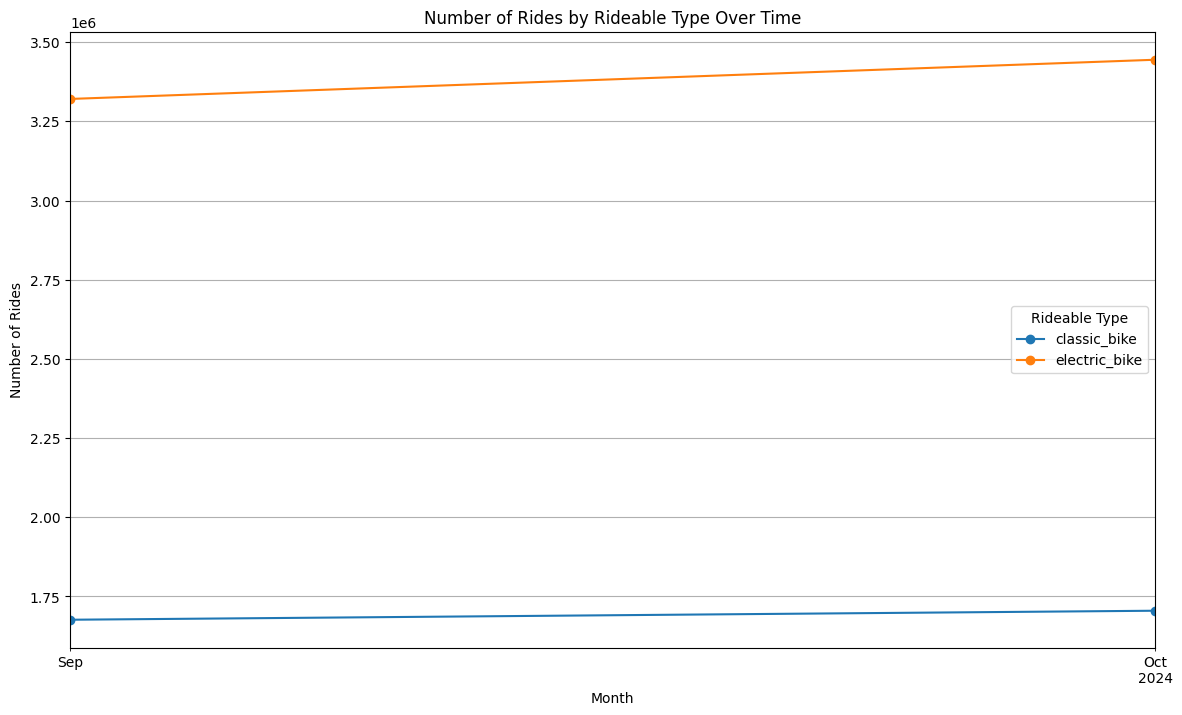

In [18]:

# Assuming df is already loaded with the relevant data

df['year_month'] = df['started_at'].dt.to_period('M')

# Group by rideable type and month, and count rides
rides_per_type_month = df.groupby(['year_month', 'rideable_type']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(14, 8))
rides_per_type_month.plot(kind='line', marker='o', ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Rideable Type Over Time')
plt.xticks(rotation=45)
plt.legend(title='Rideable Type')
plt.grid(True)

# Save the plot to a directory with a specific name
plt.savefig(f'Graphics/{year}'+ f'/NumberofRidesbyRideableType{year}.png')

# Display the plot
plt.show()